## Model: KNN Tree
Attribute Selection: None

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

def interpret_confusion_matrix(matrix,title):
    encode,class_, correct, errors, total = [],[],[],[],[]
    i=0
    for row in matrix:
        class_.append(i)
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),
                 cells=dict(values=[class_, correct, errors, total]))
                     ])
    fig.update_layout(title= title,width=650,height=400)
    fig.show()

def determine_n_value(xtrain,ytrain,xtest,ytest):
    error =[]
    cv = []
    labels = []
    for k in range(1,25):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(xtrain,ytrain)
        ypred = clf.predict(xtest)
        cv_score=cross_val_score(clf,xtrain,ytrain, cv=10)
        error_rate = np.mean(ypred!=ytest)
        # stats.append([k,np.round(error_rate,4),np.array(cv_score).mean()])
        error.append(np.round(error_rate,4))
        cv.append(np.array(cv_score).mean())
        labels.append(k)

    #Plot results    
    data = [error, cv]
    titles = ['Error Rate vs. K Value (KNN)','Cross Validation Score vs. K Value (KNN)']
    colors = ["blue","r"]
    y_labels =['Error Rate','Cross Validation Score']
    fig,axis = plt.subplots(2,1)
  
    plt.figure(figsize=(20,6))
    for i in range(2):      
        axis[i].plot(range(1,25),data[i],color=colors[i], linestyle='dashed',marker='o',markerfacecolor=colors[i], markersize=5)
        axis[i].set_title(titles[i],loc='left', fontweight='bold',  style='italic',)
        axis[i].set_xlabel('K')
        axis[i].set_ylabel(y_labels[i])

    fig.tight_layout()
    plt.show()
    return [labels,error,cv]

In [8]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

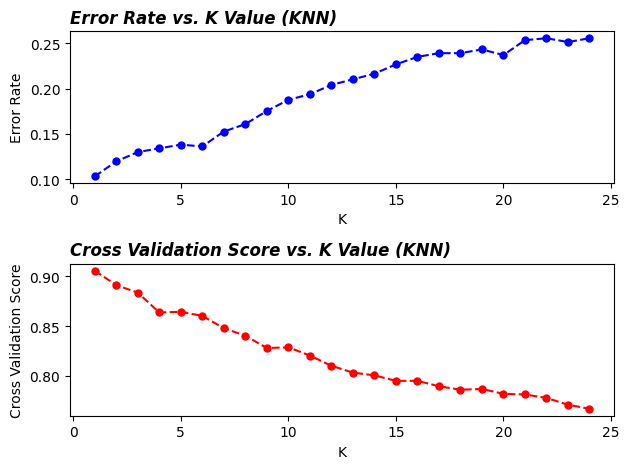

<Figure size 2000x600 with 0 Axes>

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

# determine n value
consider_n = determine_n_value(X_train,y_train,X_test,y_test)

fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Error Rate","Cross Validation"]),
                cells=dict(values=consider_n))
                    ])
fig.update_layout(title="K Value vs Error Rate & Cross Validation Score",width=650,height=700)
fig.show()


You do not want a K value that is too small, this leads me to overfitting. With that being said, we will use k = 4 since the cross validation score is high as well.

In [10]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)


#### Visualization

In [11]:
# plot_decision_regions(X_train.values, y_train.values, clf=knn, legend=6)
# # Adding axes annotations
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.title("Knn with K=7")
# plt.show()

#### Evaluation

Cross Validation Score: 0.8638072744449692
Precision Score: 0.8661913929811209
Recall Score: 0.865979381443299
F1 score: 0.8602198378587286

Confusion Matrix 
----------------


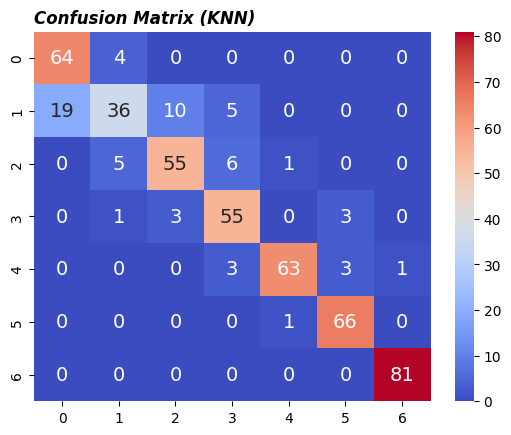

In [15]:
cv_score = np.array(cross_val_score(knn, X_train,y_train, cv=10)).mean()
cf_matrix = confusion_matrix(y_test,ypred)
metrics = precision_recall_fscore_support(y_test,ypred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]

print("Cross Validation Score: {0}\nPrecision Score: {1}\nRecall Score: {2}\nF1 score: {3}".format(cv_score,precision,recall,f1))

print("\nConfusion Matrix \n----------------")
sns.heatmap(pd.DataFrame(cf_matrix, range(7), range(7)), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (KNN)",loc='left', fontweight='bold',  style='italic')
plt.show()

interpret_confusion_matrix(cf_matrix,"Breakdown of Confusion Matrix (KNN)")                   